In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
#import csv
calendardf = pd.read_csv("SeattleAirbnbData/calendar.csv")
listingsdf = pd.read_csv("SeattleAirbnbData/listings.csv")
reviewsdf = pd.read_csv("SeattleAirbnbData/reviews.csv")

In [51]:
listingsdf.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [24]:
# Preliminary Histogram/Scatterplot matrix
reviewsdf = listingsdf.dropna(subset=['review_scores_rating'],axis=0)
reviewsdfnumeric = reviewsdf.select_dtypes(include=['float','int'])
print(reviewsdfnumeric.shape)

(3171, 30)


In [27]:
reviewsdfnumeric.dropna(axis=1, how='all')

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89
5,5956968,20160104002432,326758,1.0,1.0,47.630525,-122.366174,2,1.0,1.0,...,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,262764,20160104002432,1379138,1.0,1.0,47.654205,-122.352604,5,1.0,2.0,...,5,92.0,9.0,8.0,10.0,10.0,10.0,8.0,1,1.56
3811,8578490,20160104002432,11847918,1.0,1.0,47.657898,-122.346692,3,1.0,1.0,...,2,100.0,9.0,8.0,10.0,10.0,10.0,10.0,1,0.63
3812,3383329,20160104002432,3443346,3.0,3.0,47.654516,-122.358124,4,1.0,1.0,...,73,96.0,10.0,10.0,10.0,10.0,9.0,10.0,3,4.01
3813,8101950,20160104002432,31148752,354.0,354.0,47.664295,-122.359170,6,2.0,3.0,...,1,80.0,8.0,10.0,4.0,8.0,10.0,8.0,8,0.30


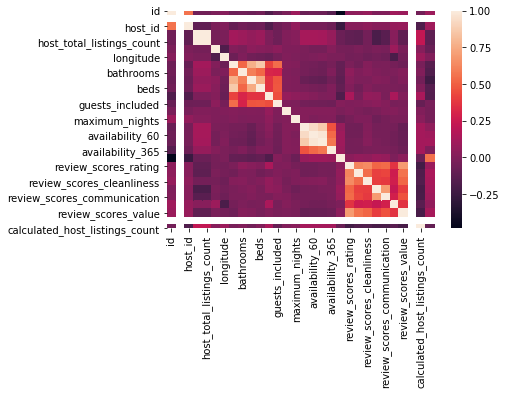

In [28]:
sns.heatmap(reviewsdfnumeric.corr())

In [5]:
#Note down insights

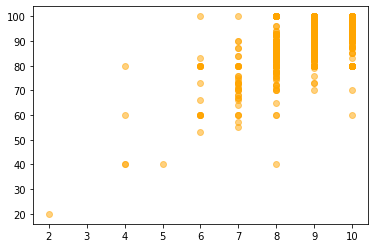

In [48]:
#Scatterplot - Rating x review_scores_value
y = listingsdf.review_scores_rating
x = listingsdf.review_scores_value
plt.scatter(x, y, alpha=0.5, color = 'orange')
plt.show()

In [44]:
#List of columns names and data types
listingsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [46]:
#How many reviews do these listings usually get per month?
listingsdf.reviews_per_month.value_counts().head(5)


1.00    70
2.00    45
0.23    24
0.81    21
0.16    21
Name: reviews_per_month, dtype: int64

In [37]:
#This looks at price by bedrooms, first we need to convert from object to float for calculation

listingsdf.price = (listingsdf['price'].replace( '[\$,)]','', regex=True ).astype(float))

In [38]:
pd.DataFrame(listingsdf.query("price < 500").groupby(['bedrooms']).mean()['price'])

,price
bedrooms,
0.0,103.548387
1.0,95.144099
2.0,168.709321
3.0,235.543796
4.0,289.375000
5.0,384.684211
6.0,475.500000
7.0,375.000000


In [42]:
listingsdf.price.value_counts().head(5)

150.0    162
100.0    159
75.0     118
95.0     110
99.0     110
Name: price, dtype: int64

In [8]:
#What features influent price?

In [11]:
#covariance
listingsdf.cov()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
id,8.777357e+12,0.0,2.361319e+13,-1.976843e+06,-1.976843e+06,-2058.985086,1256.494149,-4.351979e+05,-107641.279035,-167636.744910,...,7.262839e+05,88551.766396,152086.561269,-7847.059447,5394.155034,185599.771084,184435.414315,NaN,-8.964836e+05,4.684069e+05
scrape_id,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00
host_id,2.361319e+13,0.0,2.126877e+14,-2.905477e+07,-2.905477e+07,-15205.207780,6827.985068,-2.873136e+06,-491447.390322,-975470.365285,...,2.426817e+06,250574.214593,508760.088486,176624.603821,190957.252380,618954.690646,793688.013328,NaN,-1.512940e+07,2.607143e+06
host_listings_count,-1.976843e+06,0.0,-2.905477e+07,8.195709e+02,8.195709e+02,-0.015424,-0.000050,6.297048e+00,1.155336,1.660537,...,-1.845149e+01,-2.195774,-0.898570,-2.905753,-1.992671,0.388663,-2.190770,NaN,3.783662e+01,-5.598219e+00
host_total_listings_count,-1.976843e+06,0.0,-2.905477e+07,8.195709e+02,8.195709e+02,-0.015424,-0.000050,6.297048e+00,1.155336,1.660537,...,-1.845149e+01,-2.195774,-0.898570,-2.905753,-1.992671,0.388663,-2.190770,NaN,3.783662e+01,-5.598219e+00
latitude,-2.058985e+03,0.0,-1.520521e+04,-1.542394e-02,-1.542394e-02,0.001853,-0.000212,2.855774e-05,-0.000381,0.001488,...,-1.080924e-02,-0.000452,-0.001308,-0.000470,-0.000613,0.002614,-0.000628,NaN,6.786522e-03,-6.650349e-03
longitude,1.256494e+03,0.0,6.827985e+03,-5.035207e-05,-5.035207e-05,-0.000212,0.001008,-4.493922e-03,-0.000320,-0.001544,...,-9.827562e-03,-0.000816,-0.001575,-0.000884,-0.001104,-0.003785,-0.001042,NaN,1.615232e-02,1.484566e-04
accommodates,-4.351979e+05,0.0,-2.873136e+06,6.297048e+00,6.297048e+00,0.000029,-0.004494,3.910900e+00,0.629347,1.347287,...,-1.723535e-01,-0.069078,0.018497,-0.023336,-0.014949,-0.047028,-0.092753,NaN,-3.440853e-01,-5.234421e-01
bathrooms,-1.076413e+05,0.0,-4.914474e+05,1.155336e+00,1.155336e+00,-0.000381,-0.000320,6.293468e-01,0.348536,0.319352,...,1.769690e-01,-0.002549,0.008550,-0.001036,-0.005341,-0.003351,0.006375,NaN,-9.517589e-03,-1.819175e-01
bedrooms,-1.676367e+05,0.0,-9.754704e+05,1.660537e+00,1.660537e+00,0.001488,-0.001544,1.347287e+00,0.319352,0.780387,...,1.344319e-01,-0.007305,-0.005646,0.005485,0.000554,-0.015974,-0.000794,NaN,-2.372676e-01,-3.681479e-01


In [54]:
correlation = reviewsdfnumeric.corr(method='pearson')
correlation

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
id,1.000000,NaN,0.560857,-0.054040,-0.054040,-0.018022,0.016340,-0.061873,-0.056656,-0.071704,...,0.039246,0.045355,0.068112,-0.004710,0.003389,0.105444,0.087858,NaN,-0.042309,0.094166
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.560857,NaN,1.000000,-0.106074,-0.106074,-0.018581,-0.000085,-0.089033,-0.051631,-0.074553,...,0.027348,0.026768,0.047576,0.022116,0.025023,0.073277,0.078829,NaN,-0.171204,0.108397
host_listings_count,-0.054040,NaN,-0.106074,1.000000,1.000000,-0.037815,-0.014101,0.118462,0.091825,0.066535,...,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.226374,-0.117873
host_total_listings_count,-0.054040,NaN,-0.106074,1.000000,1.000000,-0.037815,-0.014101,0.118462,0.091825,0.066535,...,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.226374,-0.117873
latitude,-0.018022,NaN,-0.018581,-0.037815,-0.037815,1.000000,-0.170017,0.007510,-0.016254,0.043916,...,-0.038086,-0.015072,-0.038183,-0.018381,-0.025117,0.096746,-0.019488,NaN,0.024179,-0.083598
longitude,0.016340,NaN,-0.000085,-0.014101,-0.014101,-0.170017,1.000000,-0.065555,-0.003400,-0.049207,...,-0.047121,-0.037005,-0.062576,-0.046990,-0.061539,-0.190567,-0.043979,NaN,0.095237,0.001650
accommodates,-0.061873,NaN,-0.089033,0.118462,0.118462,0.007510,-0.065555,1.000000,0.527606,0.770775,...,-0.013101,-0.049665,0.011646,-0.019664,-0.013208,-0.037520,-0.062041,NaN,-0.028196,-0.143255
bathrooms,-0.056656,NaN,-0.051631,0.091825,0.091825,-0.016254,-0.003400,0.527606,1.000000,0.605361,...,0.045101,-0.006129,0.018063,-0.002939,-0.016067,-0.008959,0.014297,NaN,0.003366,-0.168248
bedrooms,-0.071704,NaN,-0.074553,0.066535,0.066535,0.043916,-0.049207,0.770775,0.605361,1.000000,...,0.023257,-0.011943,-0.008089,0.010509,0.001113,-0.028991,-0.001208,NaN,-0.042798,-0.229151


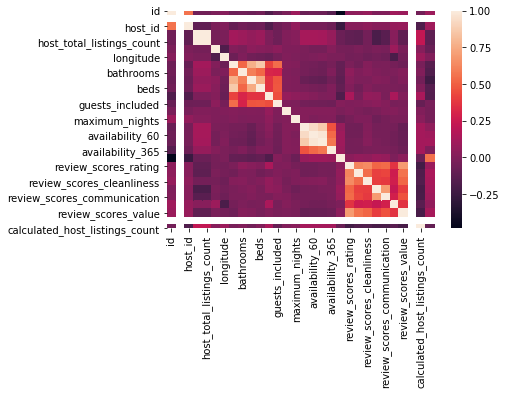

In [55]:
sns.heatmap(reviewsdfnumeric.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6715ed210>,
      dtype=object)

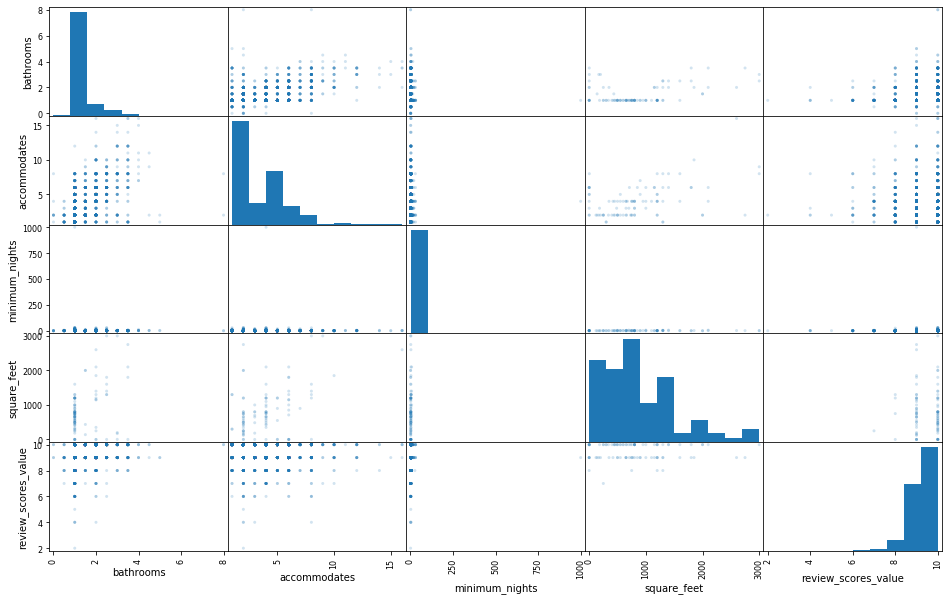

In [43]:
#Pick several columns for correlation matrix
Ycorr = listingsdf[['bathrooms','accommodates','minimum_nights','square_feet', 'review_scores_value']]
pd.plotting.scatter_matrix(Ycorr, alpha=0.2, figsize=(16, 10))

In [57]:
listingsdf.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                         45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                     11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentia

In [59]:
listingsdf.room_type.value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [60]:
listingsdf.transit.value_counts()

Convenient public transportation. The locations of our properties are ideal for guests who prefer to travel without a car.                                                                                                                                                                                                                                                                                                                                                                                                                                               32
(URL HIDDEN)                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [61]:
listingsdf.bed_type.value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [62]:
pd.DataFrame(listingsdf.query("price < 500").groupby(['bed_type']).mean()['price'])

,price
bed_type,
Airbed,73.962963
Couch,64.307692
Futon,72.824324
Pull-out Sofa,77.276596
Real Bed,125.684690


In [65]:
# Is review score ratings related to bed type?
pd.DataFrame(listingsdf.query("price < 500").groupby(['bed_type']).mean()['review_scores_rating'])

,review_scores_rating
bed_type,
Airbed,93.944444
Couch,95.375000
Futon,94.301587
Pull-out Sofa,94.820513
Real Bed,94.534506


In [67]:
# Is the price affected by the host being a super host?
pd.DataFrame(listingsdf.query("price < 500").groupby(['host_is_superhost']).mean()['price'])

,price
host_is_superhost,
f,122.656592
t,126.510996


In [73]:
# Is the price affected by the host being a super host?
pd.DataFrame(listingsdf.query("price < 500").groupby(['bedrooms','review_scores_value']).mean()['price'])

price
bedrooms review_scores_value            
0.0      4.0                   95.000000
         6.0                  129.000000
         7.0                   99.000000
         8.0                   96.695652
         9.0                  107.703704
         10.0                 100.419162
1.0      2.0                  130.000000
         4.0                   90.000000
         5.0                  110.000000
         6.0                  105.888889
         7.0                  110.333333
         8.0                  100.115385
         9.0                   98.009790
         10.0                  91.180556
2.0      4.0                  250.000000
         6.0                  149.500000
         7.0                  168.625000
         8.0                  166.976190
         9.0                  165.808612
         10.0                 166.019084
3.0      6.0                  242.000000
         7.0                  231.666667
         8.0                  231.153846
         9.0                  238.881579
         10.0                 234.323308
4.0      8.0                  339.000000
         9.0                  261.538462
         10.0                 283.161290
5.0      8.0                  399.000000
         9.0                  375.000000
         10.0                 392.142857
6.0      10.0                 475.500000
7.0      10.0                 375.000000

# Categorical Variables

In [75]:
# impute values by inserting dummy variables
def create_dummy_df(df, cat_cols, dummy_na):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [76]:
#Dropping where the salary has missing values
cat_var  = listingsdf.dropna(subset=['review_scores_value'], axis=0)

#Pull a list of the column names of the categorical variables
cat_df = cat_var.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(listingsdf, cat_cols_lst, dummy_na=False) #Use your newly created function

print(df_new.shape)

(3818, 60097)


In [77]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'review_scores_value', cat_cols_lst, dummy_na=False)

In [78]:
test_score

0.18386215198953337